<a href="https://colab.research.google.com/github/anandawln/datascience_01/blob/main/SARIMA_MODEL__DATA_SCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">SARIMA Model to Predict ADIDAS Sales Revenue</h1>

"This project aims to analyze and model Adidas' historical sales data using a time series approach by implementing the SARIMA (Seasonal Autoregressive Integrated Moving Average) model to predict future revenue based on trends, seasonal patterns, and fluctuations in sales data. The primary focus is to understand sales patterns, develop an accurate predictive model, evaluate and optimize the model's performance, and provide data-driven insights to support Adidas' strategic decision-making, such as inventory planning and marketing campaigns, to enhance future business planning"

In [10]:
import pandas as pd
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings


In [13]:
data = pd.read_csv("Histori_Penjualan_Adidas.csv")
data.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [17]:
# check Adidas quarterly revenue
import plotly.express as px
figure = px.line(data, x="Time Period", y="Revenue", title="Quarterly Revenue")
figure.show()

<Figure size 640x480 with 0 Axes>

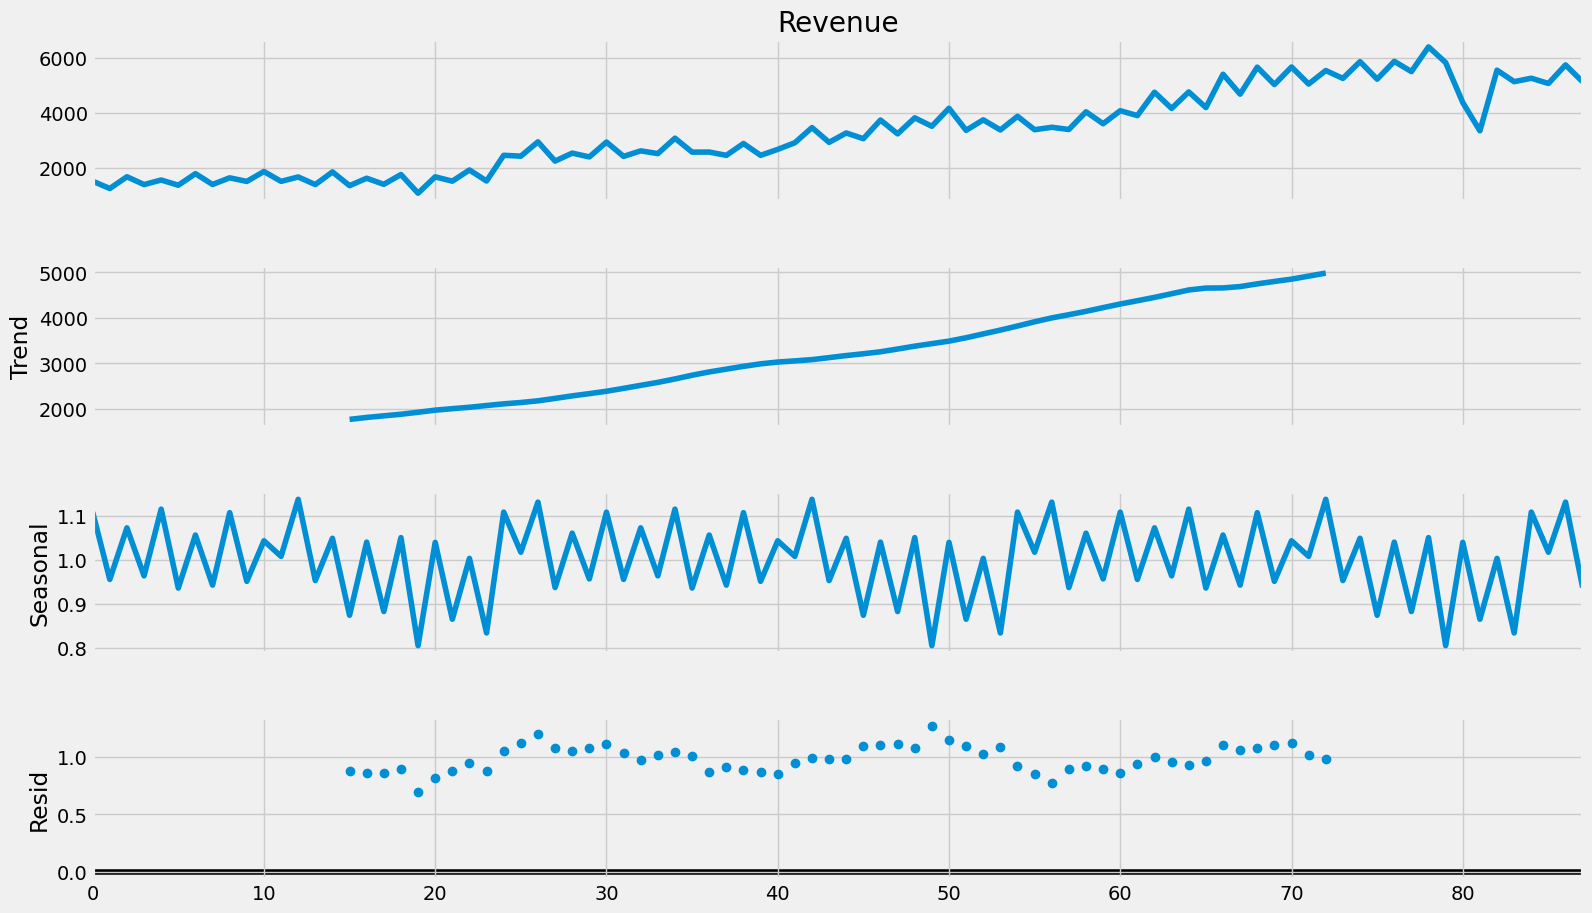

In [18]:
# revenue is seasonal and fluctuates, so it is categorized as seasonal, however, we first check using a graph
result = seasonal_decompose(data["Revenue"], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18.5, 10.5)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

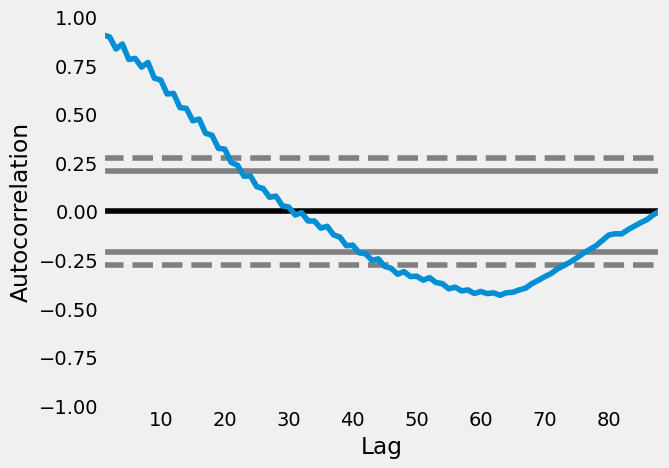

In [19]:
# graph results show seasonal ARIMA (seasonal) --> SARIMA
# then we can determine d = 1, now we find p and q, find the value of p first using the autocorrelation plot
pd.plotting.autocorrelation_plot(data["Revenue"])

In [20]:
d = 1 # this is due to seasonal
p = 5 # this is because there are 5 lines through which the graph decreases to increases

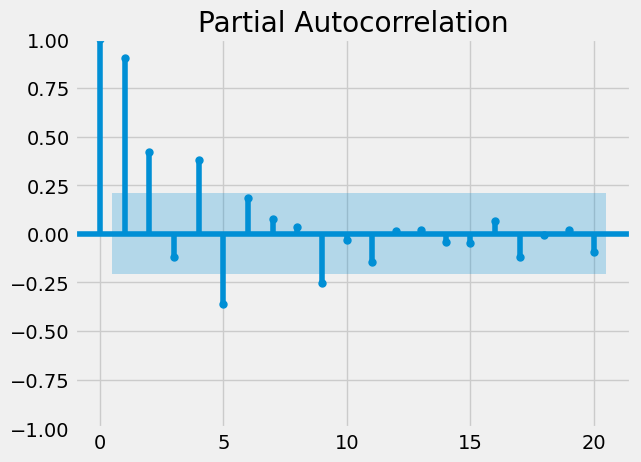

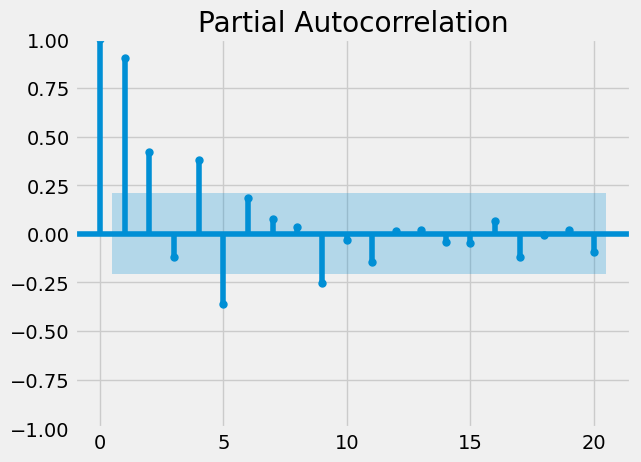

In [21]:
# finding the q value using partial autocorrelation
plot_pacf(data["Revenue"], lags = 20)

In [22]:
q = 2

In [24]:
# Start making model
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

model = sm.tsa.statespace.SARIMAX(data["Revenue"], order=(p, d, q), seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Sat, 15 Mar 2025   AIC                           1127.041
Time:                                    10:10:04   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5797      0.391     -4.038      0.000      -2.346      -0.813
ar.L2         -1.4322      0.591   

In [25]:
# Estimate adidas quarterly revenue for eight quarters
predictions = model.predict(len(data), len(data)+7)
print(predictions)

88    6078.750721
89    5186.296849
90    6293.183585
91    5751.867491
92    5911.933256
93    5499.806461
94    6389.598569
95    5728.795568
Name: predicted_mean, dtype: float64


<Axes: >

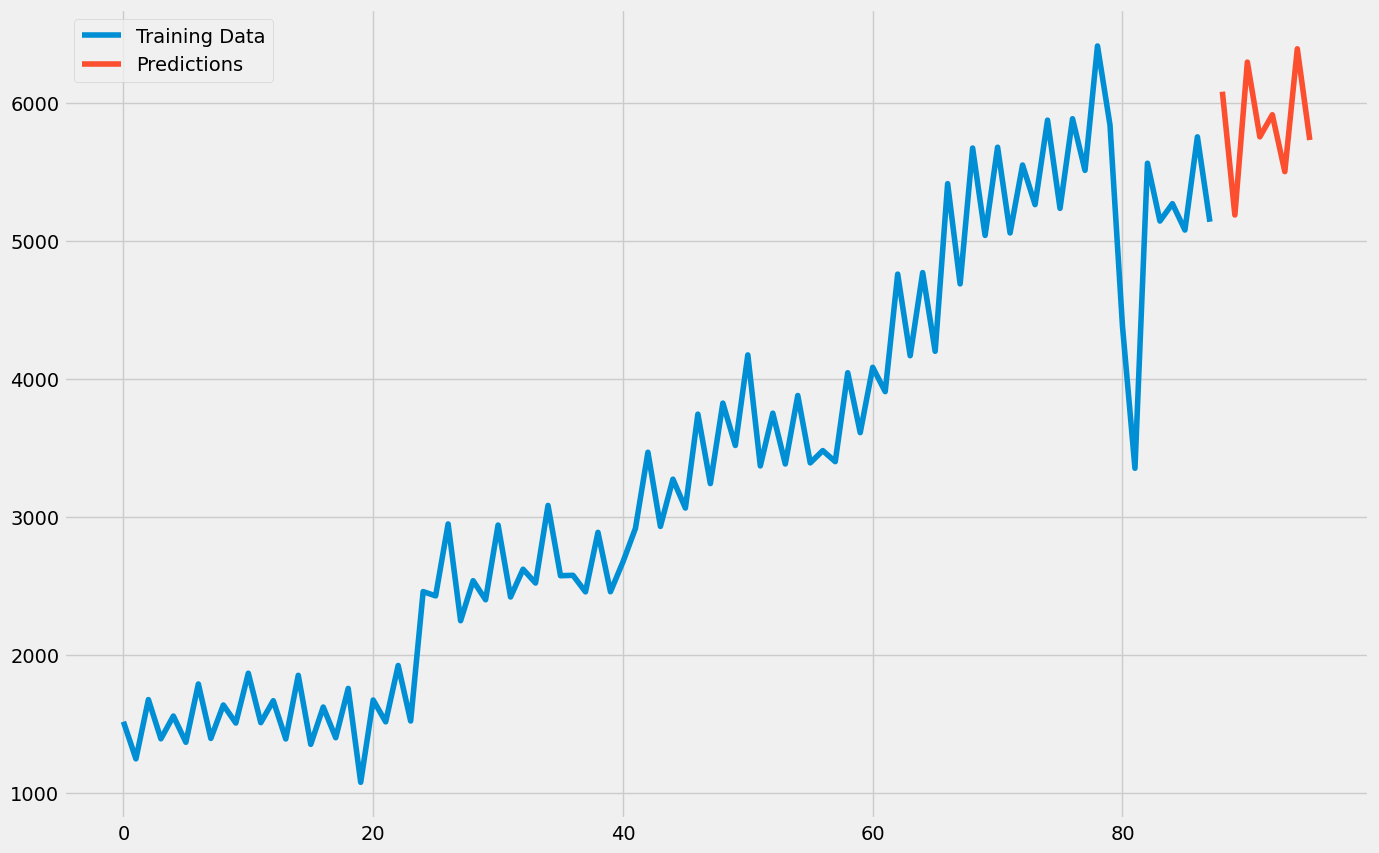

In [26]:
# visualize using graphs
data["Revenue"].plot(legend = True, label = "Training Data", figsize = (15, 10))
predictions.plot(legend = True, label = "Predictions")

## CONCLUSION
**Training Data:**
The blue curve represents historical data or training data, showing Adidas' sales revenue trends over time. This data generally increases, with significant fluctuations, especially after around point 60 on the x-axis. This indicates the presence of seasonal patterns or significant volatility in sales.

Overall, the trend is upward, potentially reflecting Adidas' business growth over time, although there are some sharp declines (e.g., around points 70-80).

**Predictions:**
The red curve represents revenue predictions based on the SARIMA model. These predictions begin after the training data ends (around point 80) and show significant variation with sharp peaks and troughs.

The prediction pattern seems to reflect the seasonal nature of the data, a key characteristic captured by the SARIMA model. This model is designed to handle time series data with seasonal components, trends, and noise.

**SARIMA Model Interpretation:**
SARIMA is an extension of the ARIMA model that incorporates seasonal components. It is typically denoted as SARIMA(p,d,q)(P,D,Q)s, where:
- (p): order of autoregression (AR).
- (d): degree of differencing for stationarity.
- (q): order of the moving average (MA).
- (P, D, Q): seasonal parameters.
- (s): length of the seasonal period.

From the graph, the model seems to have captured the upward trend and seasonal fluctuations well, but the predictions exhibit high volatility, which might indicate uncertainty or that the model has not fully stabilized the patterns.

**Performance Analysis:**
There is a noticeable difference between the training data and predictions at the transition point (around 80), which could indicate that the model needs further adjustments. The sharp decline in the training data before the predictions start may not have been well-anticipated by the model, causing the initial predictions to spike.

High volatility in the predictions might suggest that the model is sensitive to recent data or that external factors (e.g., promotions, seasons, or economic events) are not fully accounted for.

**Recommendations:**
- Revisit the SARIMA parameters used (e.g., seasonal order (s) and parameters (P, D, Q)) to ensure they align with the data patterns.
- Consider adding external variables (e.g., economic factors or marketing campaigns) if available, perhaps using the SARIMAX approach.
- Validate the model using metrics such as MAE (Mean Absolute Error) or RMSE (Root Mean Square Error) to assess prediction accuracy.
